Linear regression to predict streamflow. Forcings are aggregated from hourly to daily to match streamflow resolution.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import metrics, svm, neural_network, ensemble
from datetime import datetime, timedelta
import hydroeval
import netCDF4 as nc
from src import load_data, evaluate

time_stamp = datetime.now().strftime('%Y%m%d-%H%M%S')
time_stamp

np.random.seed(0)

In [2]:
station_data_dict = load_data.load_train_test_gridded_aggregatedForcings()

In [8]:
# Create test and train splits for each station (by time), then create predictions for each subbasin
history = 7
train_start = datetime.strptime('2010-01-01', '%Y-%m-%d') + timedelta(days=history + 1)
train_end = '2013-12-31'
test_start = datetime.strptime(train_end, '%Y-%m-%d') + timedelta(days=1)
test_end = '2014-12-31'

predictions = {}
actuals = {}
models = {}
for station in station_data_dict.keys():
    station_data = station_data_dict[station]
    station_train = station_data.loc[train_start : train_end]
    station_test = station_data.loc[test_start : test_end]

    m = linear_model.Ridge(alpha=.5, random_state=123)
    m.fit(station_train.drop(['station', 'runoff'], axis=1), station_train['runoff'])

    station_test = station_test[~pd.isna(station_test['runoff'])]
    if len(station_test) == 0:
        print('Skipping', station)
        continue

    predict = pd.DataFrame(index=station_test.index)
    predict = predict.join(station_test.drop(['station', 'runoff'], axis=1))
    predict['runoff'] = np.nan
    predict['runoff'] = m.predict(predict.drop('runoff', axis=1))

    predictions[station] = predict[['runoff']]
    actuals[station] = station_test['runoff']
    models[station] = m
    load_data.pickle_model('LinReg_VIC_aggregateForcings', m, station, time_stamp, torch_model=False)

Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GA010_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GA018_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GA038_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GA047_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GB001_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GB007_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GC002_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GC007_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GC010_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GC018_20190703-085717.pkl
Saved model as ../pickle/models/LinReg_VIC_aggregateForcings_02GC026_20190703-085717.pkl
Saved model as ../pic

02GA010 	NSE: 0.18729279375354246 	MSE: 402.49157746482604 (clipped to 0)
02GA018 	NSE: 0.20735612542140625 	MSE: 167.4752000413838 (clipped to 0)
02GA038 	NSE: 0.18171313883198426 	MSE: 135.46248089230846 (clipped to 0)
02GA047 	NSE: 0.23055458229833725 	MSE: 62.282449096248065 (clipped to 0)
02GB001 	NSE: 0.07800784180302034 	MSE: 7363.201447132366 (clipped to 0)
02GB007 	NSE: 0.36384948277402573 	MSE: 15.93623084953053 (clipped to 0)
02GC002 	NSE: 0.25751935592421404 	MSE: 47.431024577446266 (clipped to 0)
02GC007 	NSE: 0.376165334808481 	MSE: 13.959204794813303 (clipped to 0)
02GC010 	NSE: 0.3963621172233449 	MSE: 16.521718364672353 (clipped to 0)
02GC018 	NSE: 0.22889147783940078 	MSE: 28.949135313159328 (clipped to 0)
02GC026 	NSE: 0.3594432482596511 	MSE: 67.16273858347502 (clipped to 0)
02GD004 	NSE: 0.24648253133897313 	MSE: 33.29474281740702 (clipped to 0)
02GE007 	NSE: 0.27880872415087776 	MSE: 22.192186944340488 (clipped to 0)
02GG002 	NSE: 0.3448466295851713 	MSE: 119.8858

../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: Ru

04193500 	NSE: -0.7647815502995272 	MSE: 116763.98585239529 (clipped to 0)
04195820 	NSE: -0.4068338029749756 	MSE: 933.4130834017499 (clipped to 0)
04196800 	NSE: -0.057245652216938 	MSE: 172.58084627762113 (clipped to 0)
04197100 	NSE: 0.21251917620978789 	MSE: 48.293763743956916 (clipped to 0)
04198000 	NSE: -0.04085748252761667 	MSE: 3910.8591926404592 (clipped to 0)
04199000 	NSE: 0.11009749969089833 	MSE: 486.5015301440387 (clipped to 0)
04199500 	NSE: 0.13237067375414668 	MSE: 248.0274041157632 (clipped to 0)
04200500 	NSE: 0.25656004647271946 	MSE: 579.0542467139463 (clipped to 0)
04207200 	NSE: 0.2967445783545941 	MSE: 17.11887235027416 (clipped to 0)
04208504 	NSE: 0.25510566842021587 	MSE: 720.9224022599833 (clipped to 0)
04209000 	NSE: 0.30788562102782224 	MSE: 203.61641480898626 (clipped to 0)


../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: Ru

04212100 	NSE: 0.14494626692587687 	MSE: 1032.0134364653577 (clipped to 0)
04213000 	NSE: 0.20651631549717264 	MSE: 113.9664480719811 (clipped to 0)
04213500 	NSE: 0.05656173202983639 	MSE: 415.4593217031534 (clipped to 0)
04214500 	NSE: -0.23327956514578974 	MSE: 109.27634948147896 (clipped to 0)
04215000 	NSE: 0.2528312134937932 	MSE: 65.81876704569606 (clipped to 0)
04215500 	NSE: 0.23789700635491728 	MSE: 91.99477934863033 (clipped to 0)
Median NSE (clipped to 0) 0.24075180830375015 / Min -0.7647815502995272 / Max 0.46976951493212415
Median MSE (clipped to 0) 109.75972412923113 / Min 4.606921601098215 / Max 116763.98585239529


../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(17,4))
../src/evaluate.py:40: Ru

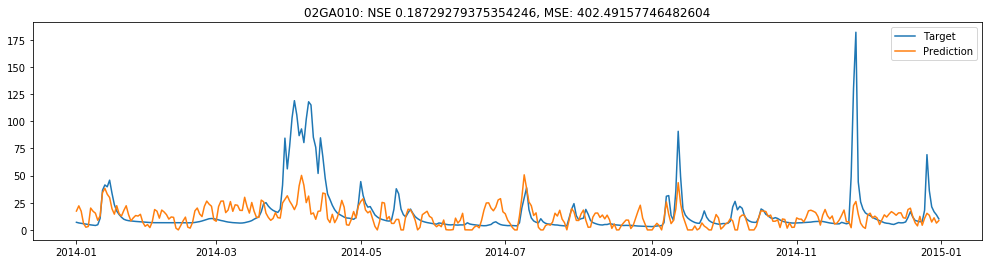

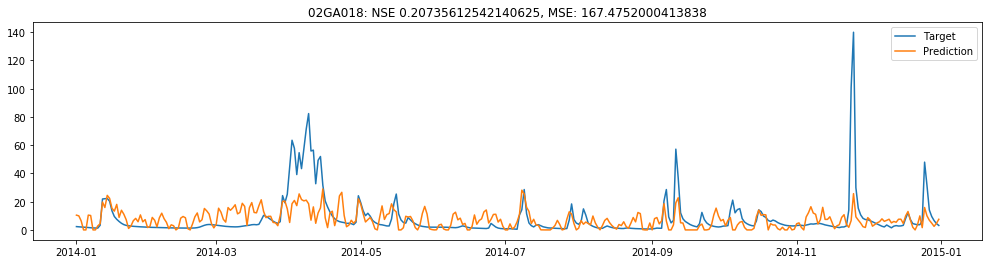

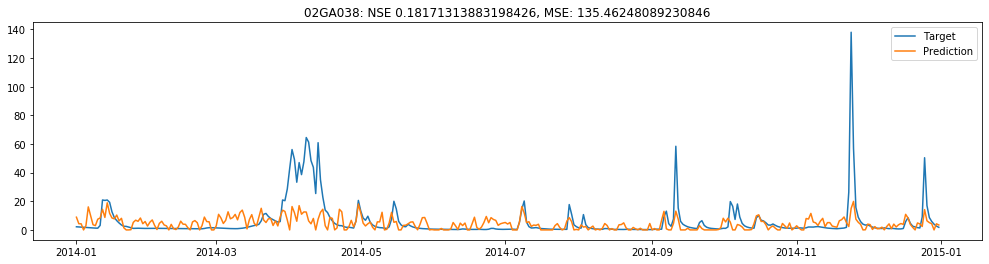

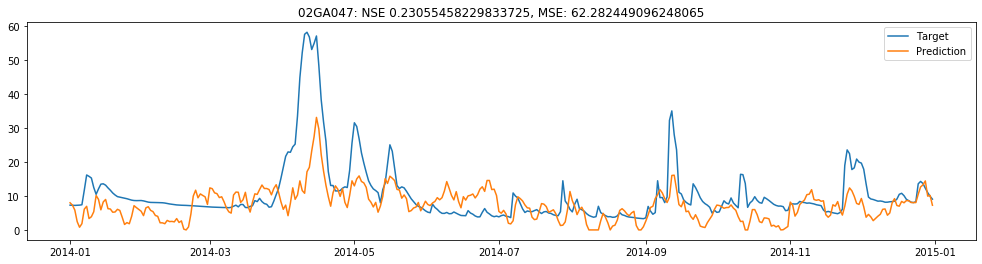

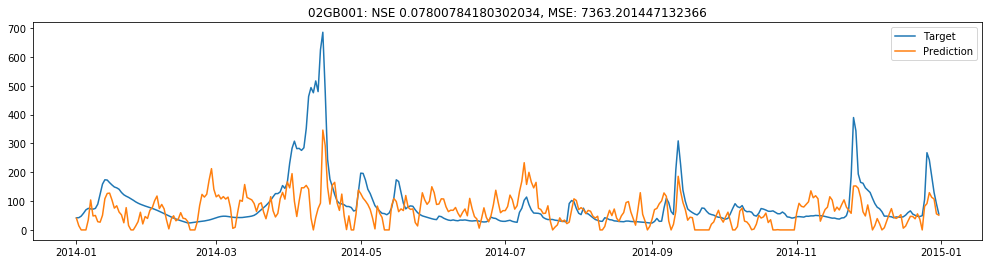

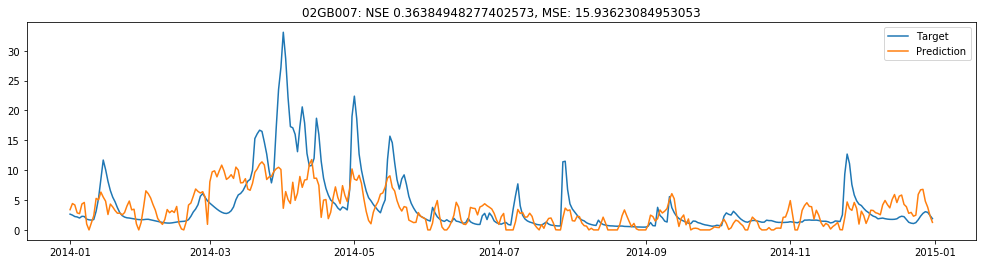

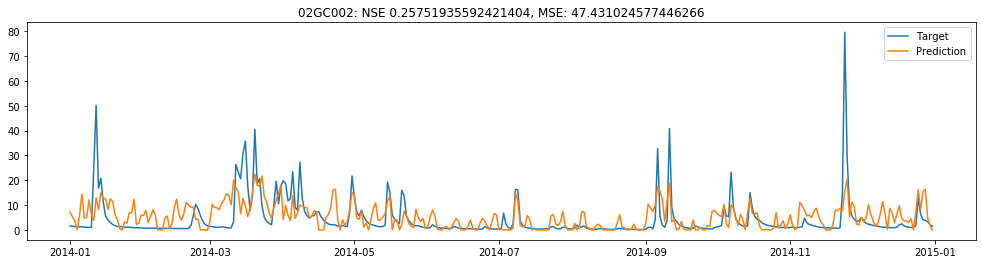

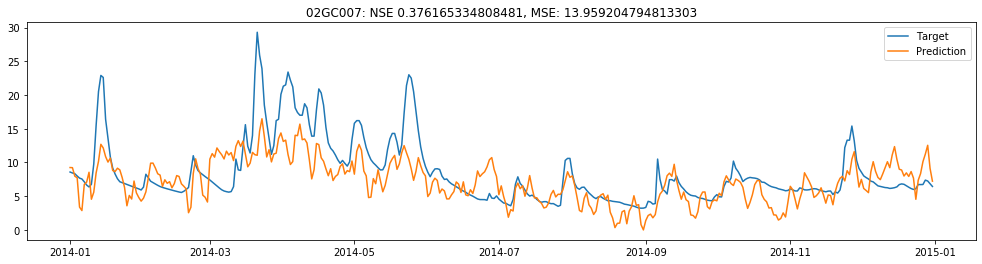

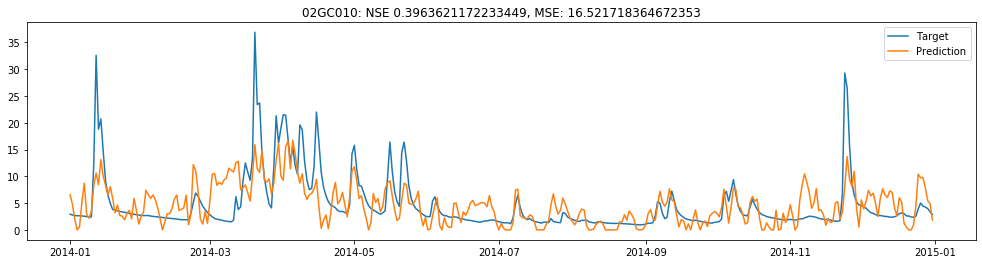

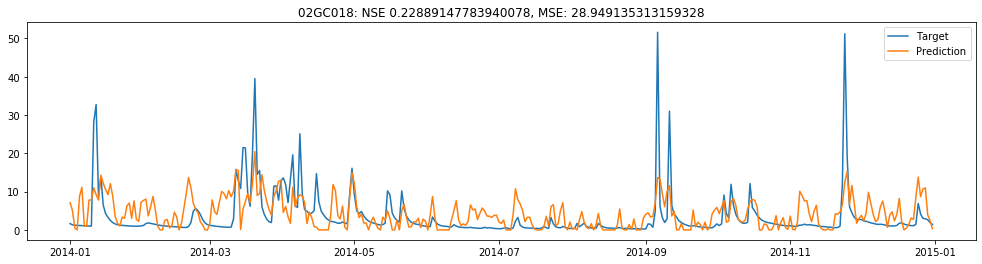

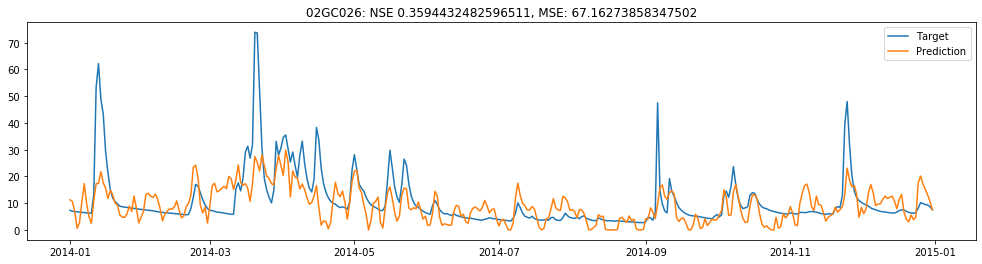

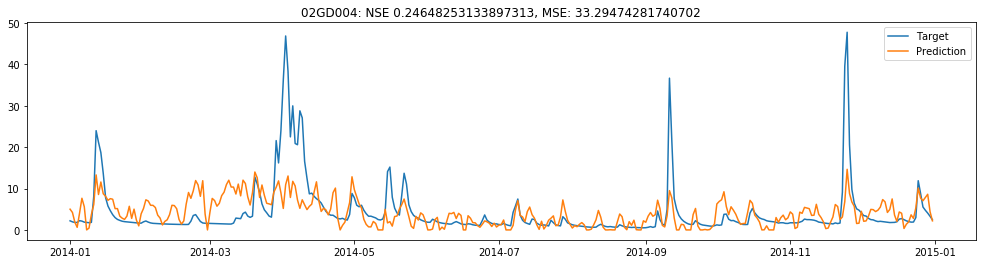

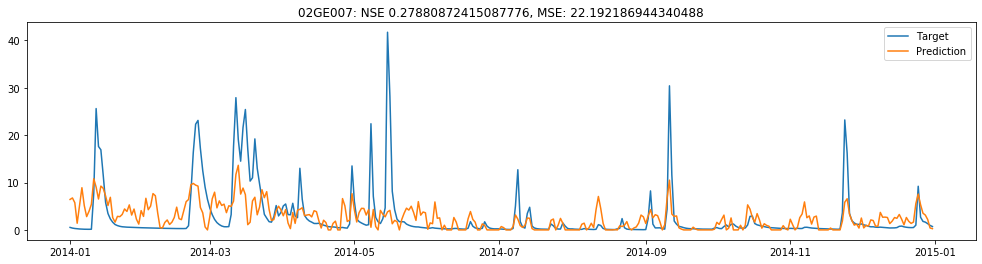

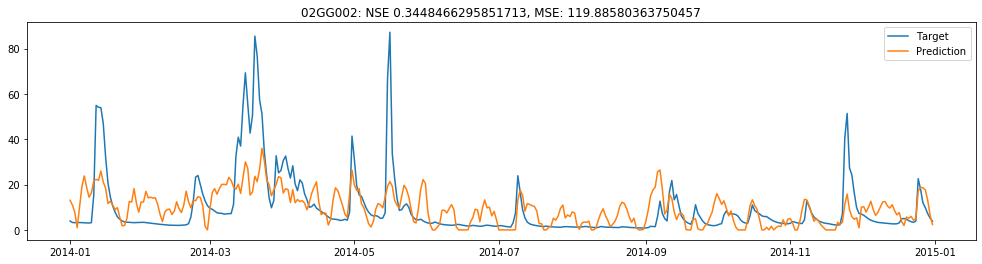

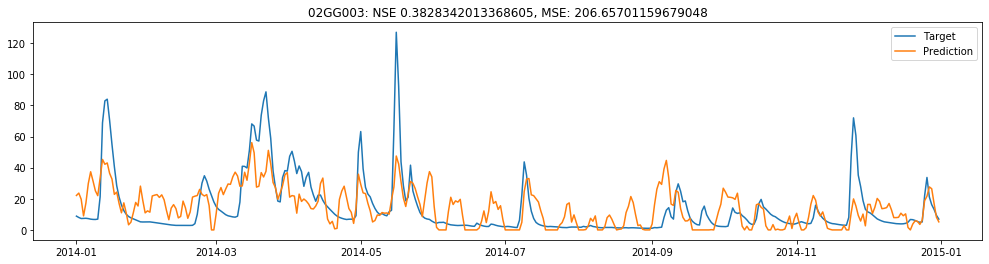

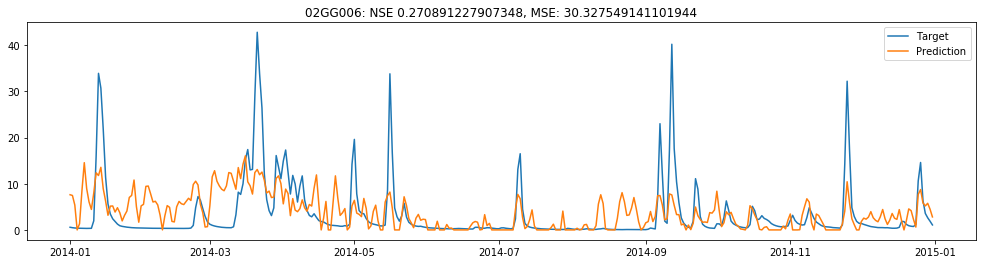

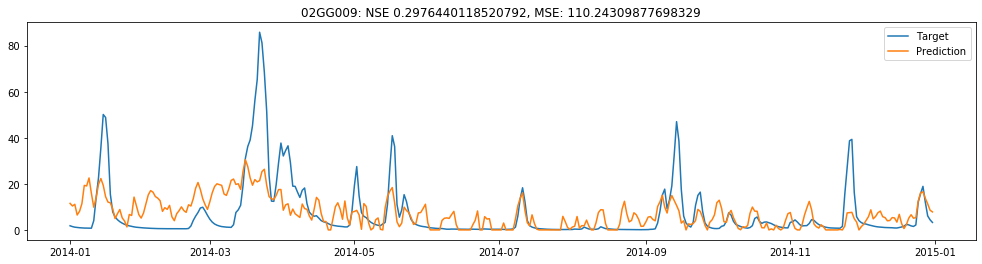

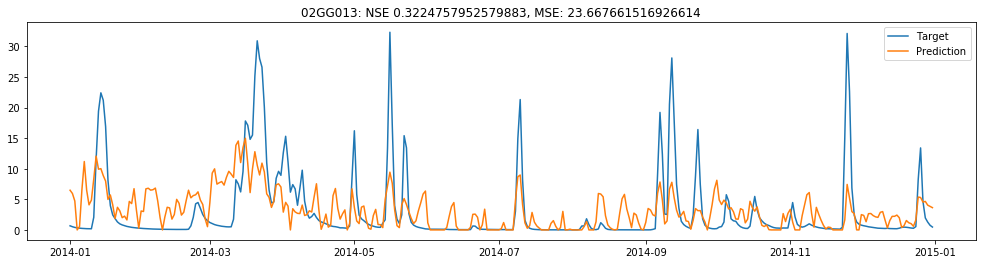

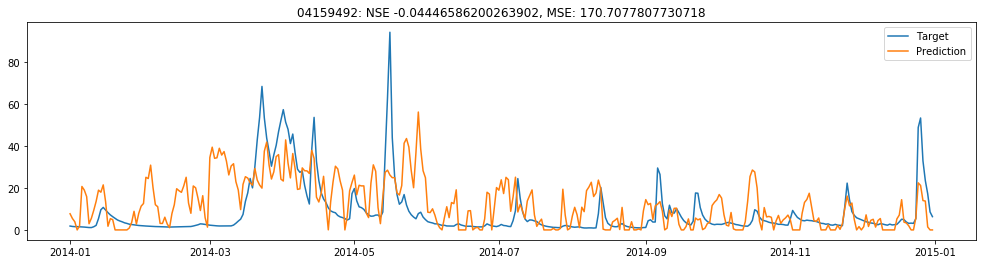

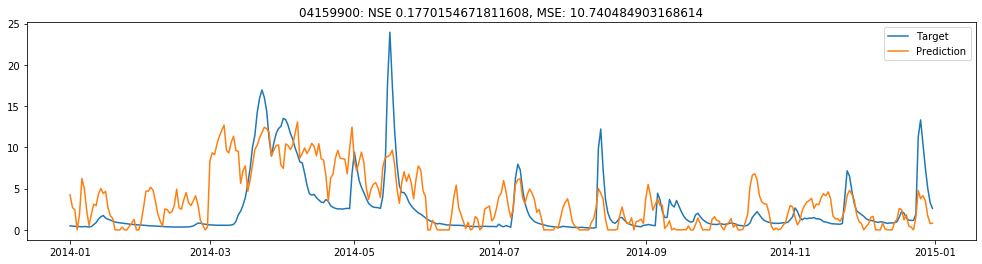

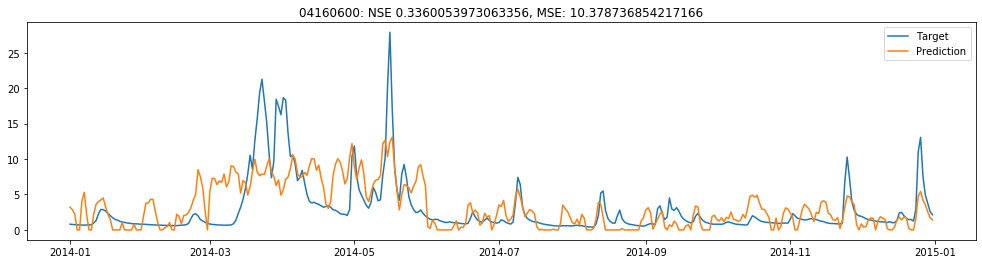

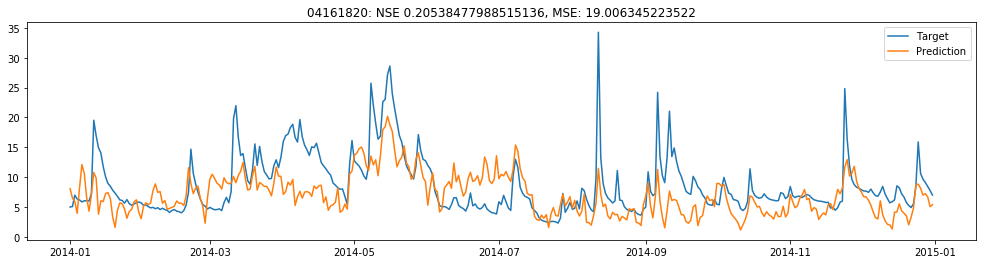

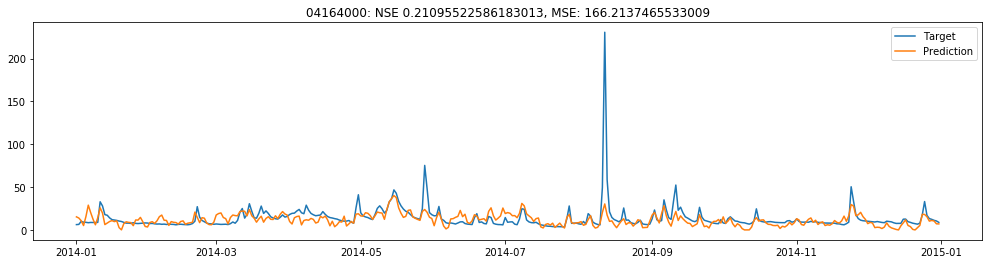

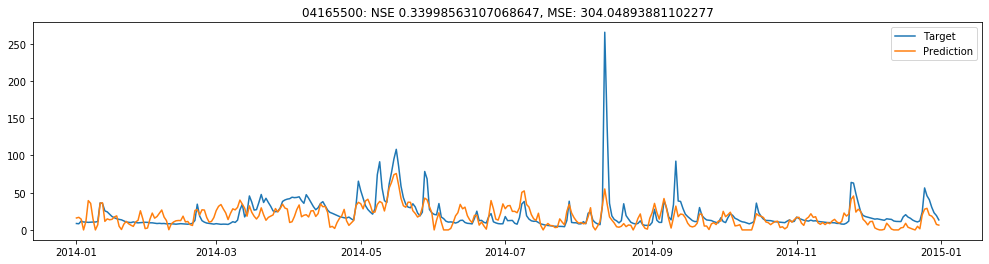

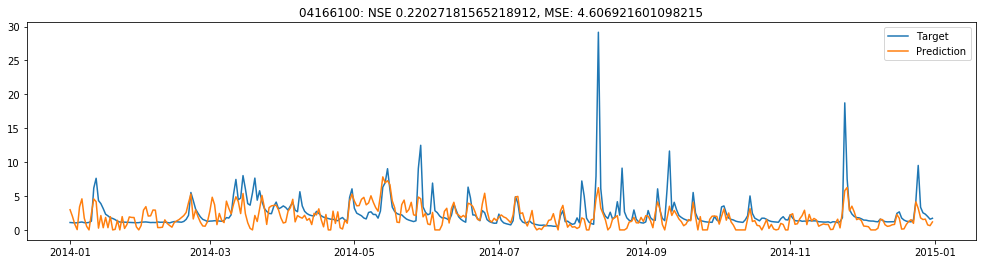

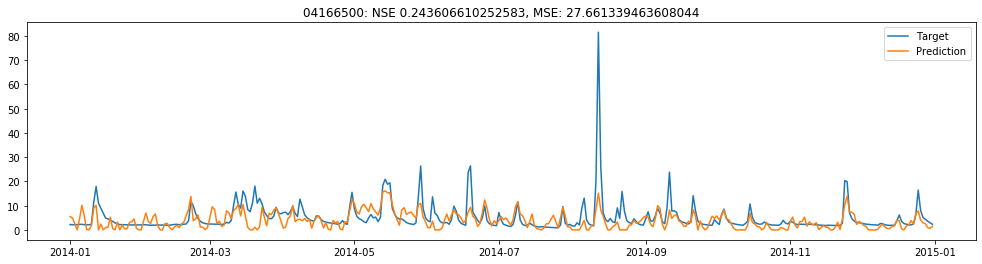

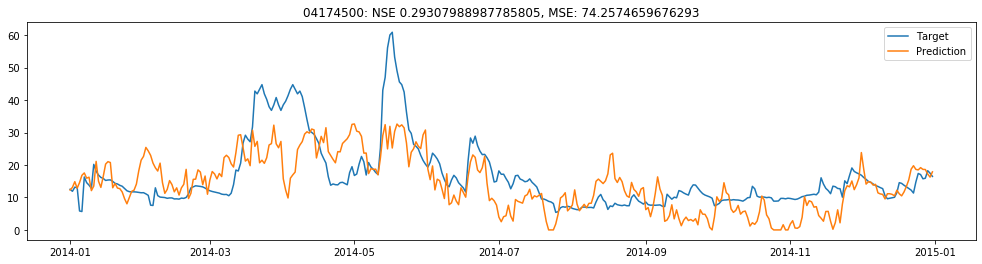

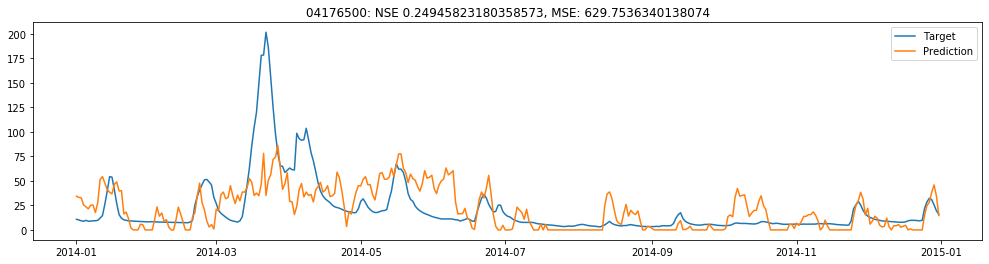

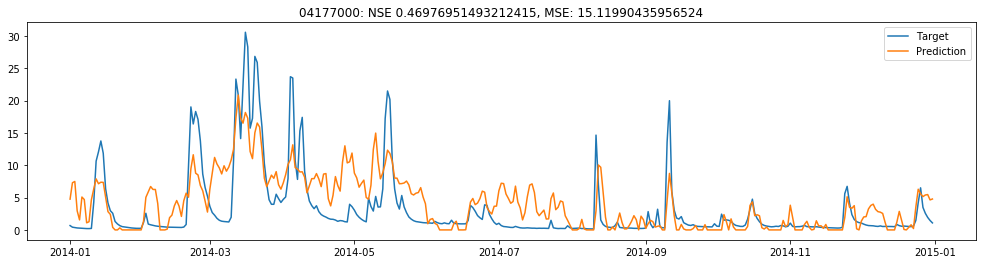

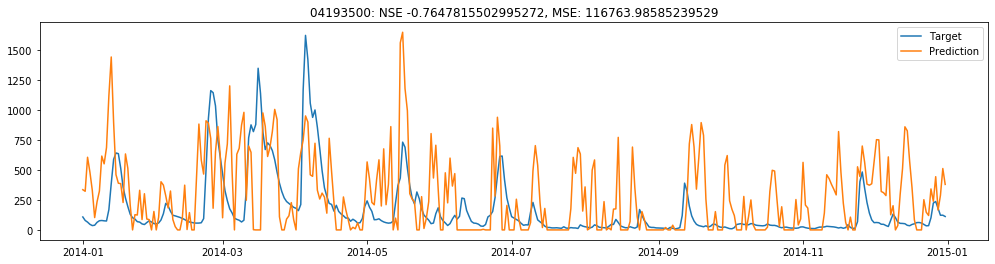

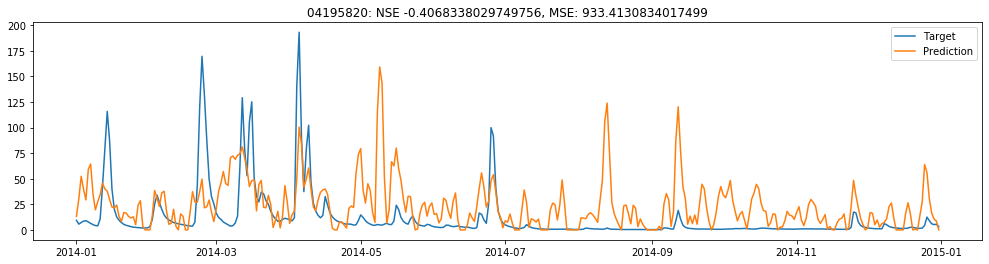

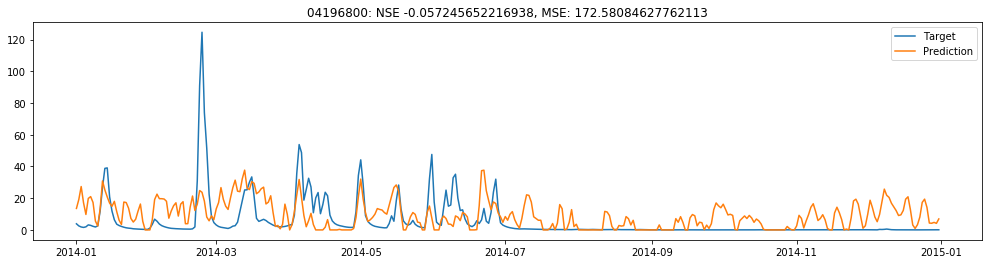

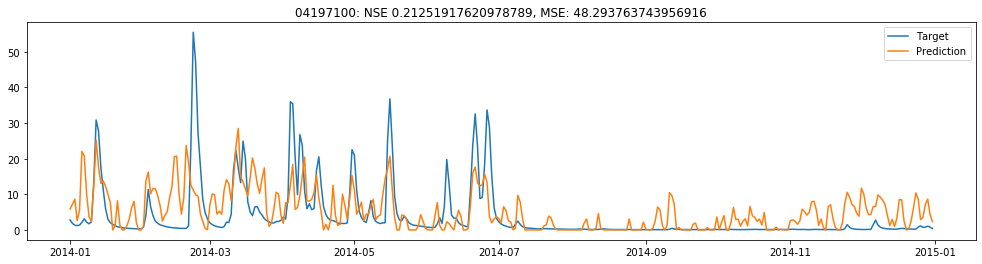

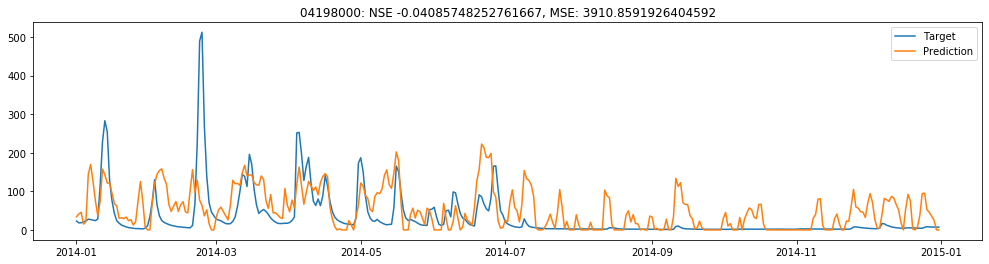

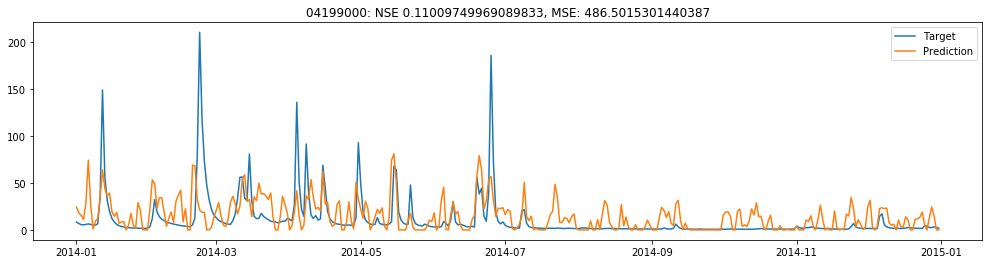

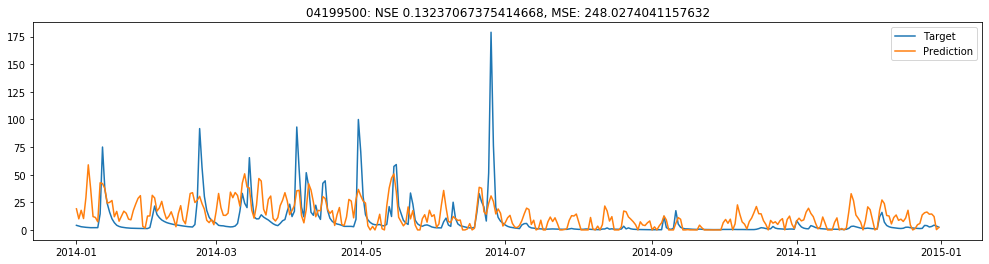

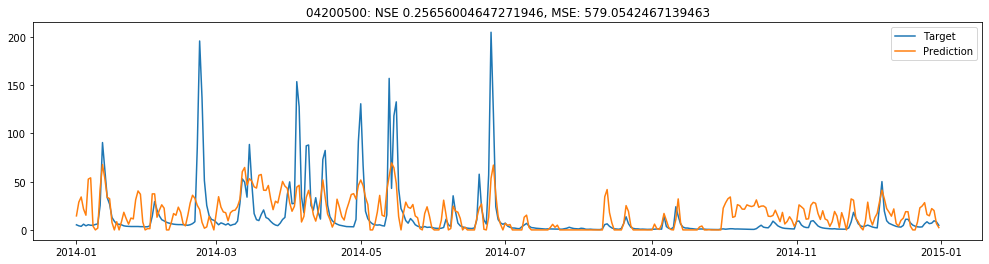

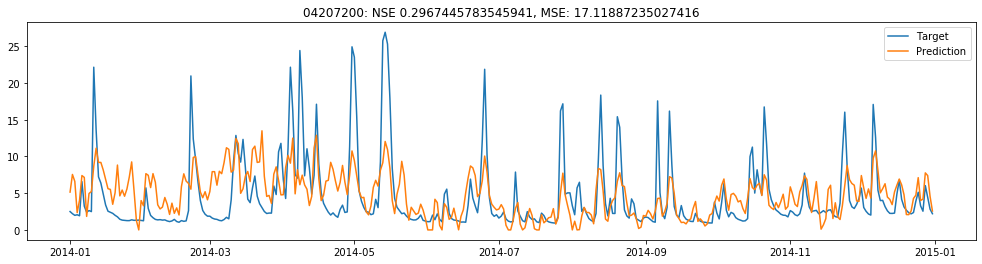

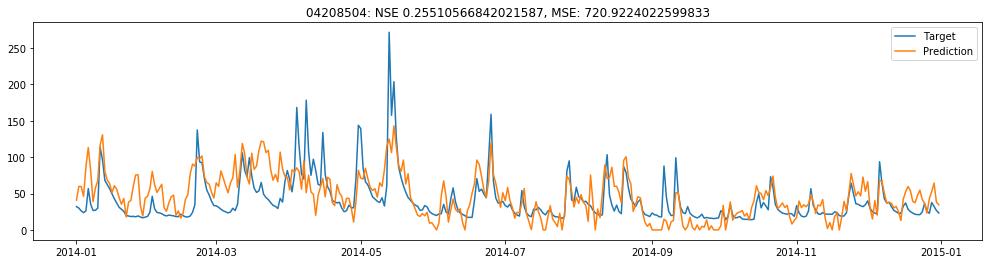

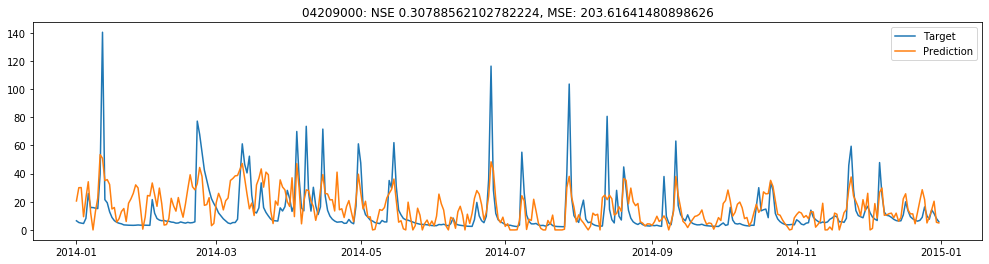

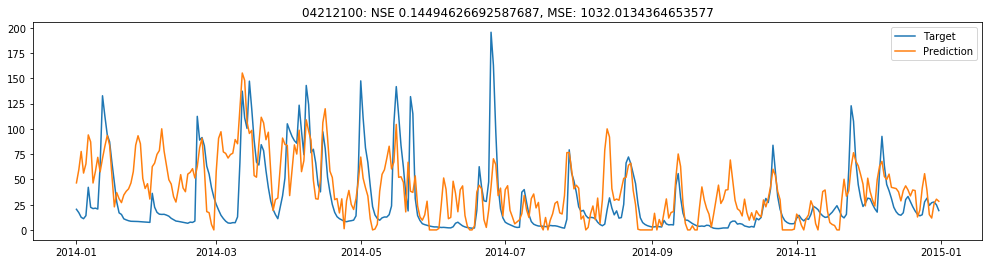

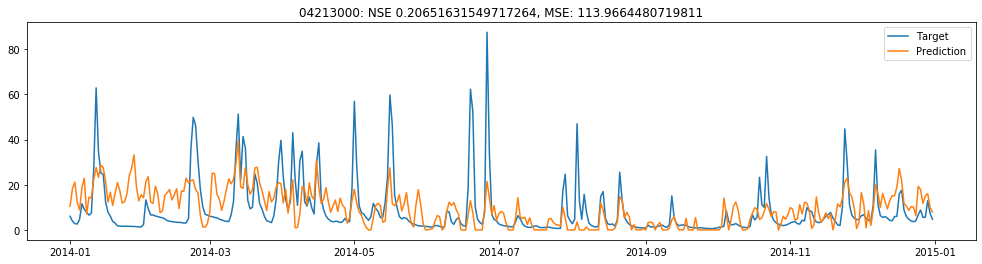

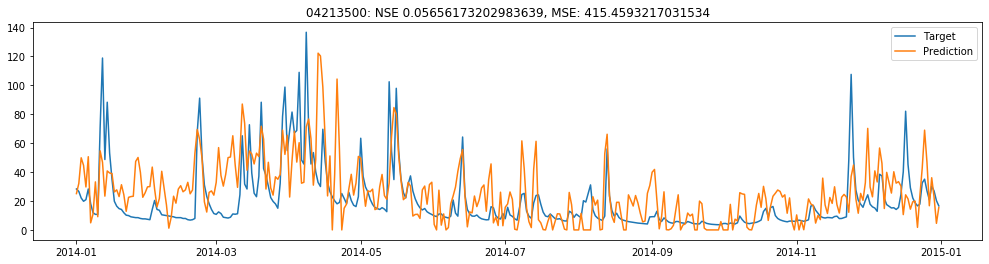

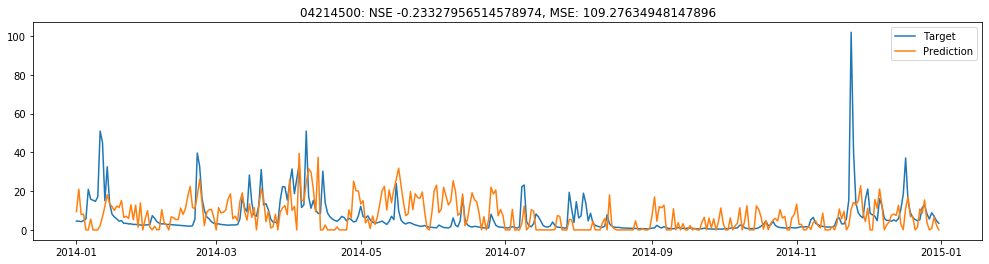

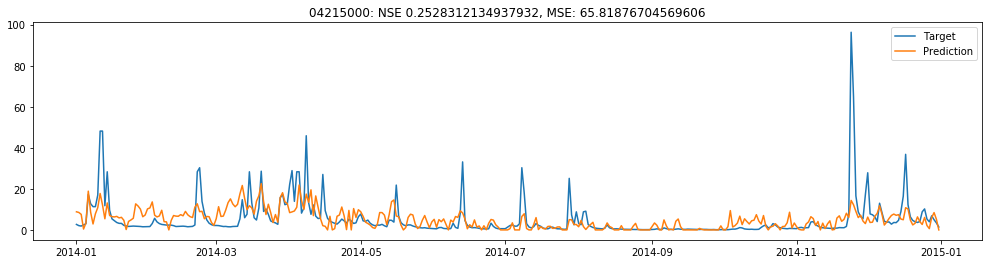

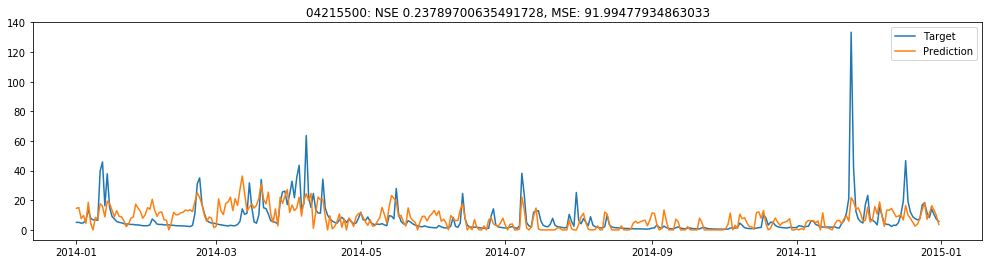

In [9]:
nse_list = []
mse_list = []
for station, predict in predictions.items():
    nse, mse = evaluate.evaluate_daily(station, predict, actuals[station], plot=True)
    nse_list.append(nse)
    mse_list.append(mse)
    
    print(station, '\tNSE:', nse, '\tMSE:', mse, '(clipped to 0)')

print('Median NSE (clipped to 0)', np.median(nse_list), '/ Min', np.min(nse_list), '/ Max', np.max(nse_list))
print('Median MSE (clipped to 0)', np.median(mse_list), '/ Min', np.min(mse_list), '/ Max', np.max(mse_list))

In [10]:
load_data.pickle_results('LinReg_VIC_aggregateForcings', (predictions, actuals), time_stamp)

'LinReg_VIC_aggregateForcings_20190703-085717.pkl'